<a href="https://colab.research.google.com/github/PranayGulhane/readme/blob/main/Low_alloy_steel_properties_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low Alloy Steel Properties Prediction


**Project: prediction of the mechanical properties of steel using the alloy composition.**


#Data Analysis and Cleaning

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Low_alloy_steel_dataset/Las.csv')
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [ ]:
df.shape

(915, 20)

In [ ]:
list(df.columns)

['Alloy code',
 ' C',
 ' Si',
 ' Mn',
 ' P',
 ' S',
 ' Ni',
 ' Cr',
 ' Mo',
 ' Cu',
 'V',
 ' Al',
 ' N',
 'Ceq',
 'Nb + Ta',
 ' Temperature (°C)',
 ' 0.2% Proof Stress (MPa)',
 ' Tensile Strength (MPa)',
 ' Elongation (%)',
 ' Reduction in Area (%)']

Checking if there are any NaN values in dataset

In [ ]:
df.isnull().sum()

Alloy code                  0
 C                          0
 Si                         0
 Mn                         0
 P                          0
 S                          0
 Ni                         0
 Cr                         0
 Mo                         0
 Cu                         0
V                           0
 Al                         0
 N                          0
Ceq                         0
Nb + Ta                     0
 Temperature (°C)           0
 0.2% Proof Stress (MPa)    0
 Tensile Strength (MPa)     0
 Elongation (%)             0
 Reduction in Area (%)      0
dtype: int64

Dataset do not have any NaN values

In [ ]:
df.describe()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,0.174929,0.310918,0.812962,0.014543,0.010602,0.143016,0.427861,0.442870,0.079148,0.060190,0.012435,0.007652,0.093989,0.000041,351.601093,328.218579,496.248087,26.789071,70.206557
std,0.059674,0.086871,0.342775,0.005244,0.004024,0.172746,0.457568,0.394383,0.058481,0.096403,0.013067,0.002321,0.172533,0.000261,189.714773,131.653232,239.710650,8.806595,12.389289
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.000000,27.000000,162.000000,10.000000,18.000000
25%,0.130000,0.240000,0.500000,0.010000,0.008000,0.023000,0.040000,0.050000,0.040000,0.000000,0.004000,0.006200,0.000000,0.000000,200.000000,220.000000,413.000000,20.000000,62.000000
50%,0.160000,0.300000,0.680000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,400.000000,290.000000,479.000000,26.000000,71.000000
75%,0.200000,0.370000,1.210000,0.018000,0.012000,0.210000,1.000000,0.560000,0.110000,0.070000,0.016000,0.009000,0.000000,0.000000,500.000000,432.500000,575.000000,31.000000,80.000000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,650.000000,690.000000,6661.000000,78.000000,94.000000


In [ ]:
# removeing Alloy code column because it is for information only
df.drop('Alloy code', axis='columns', inplace=True)

In [ ]:
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


Visualizing each material

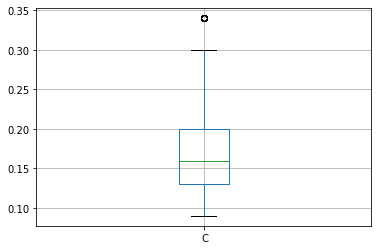

In [ ]:
boxplot = df.boxplot(column=' C')


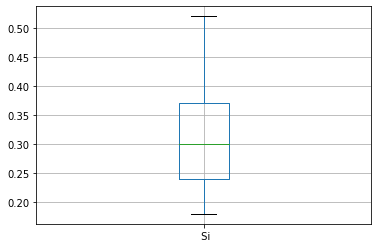

In [ ]:
# plotting Si variable
boxplot = df.boxplot(column=[' Si'])

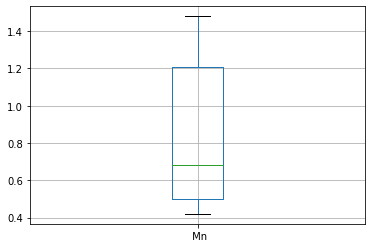

In [ ]:
# plotting Mn variable
boxplot = df.boxplot(column=[' Mn'])

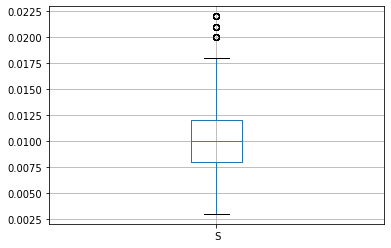

In [ ]:
# plotting S variable in descending order
boxplot = df.boxplot(column=[' S'])

In [ ]:
# calculating skewness of Cu variable
cu_skewness = df[' S'].skew()
cu_skewness

0.6234706257663276

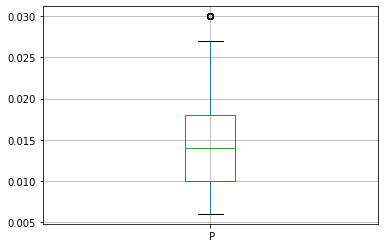

In [ ]:
# plotting P variable in descending order
boxplot = df.boxplot(column=[' P'])

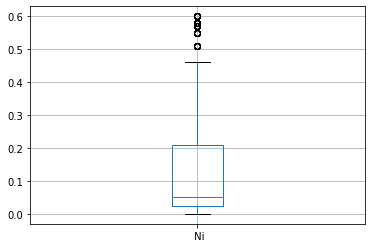

In [ ]:
# plotting Ni variable
boxplot = df.boxplot(column=[' Ni'])

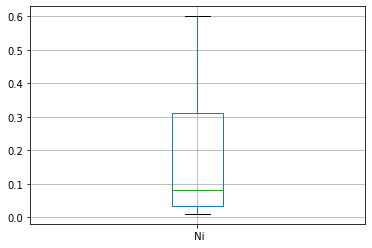

In [ ]:
# plotting non-zero Ni variable
df_Ni = df["index" and " Ni"]
df_Ni_nonzero = df_Ni[df_Ni != 0]
df_Ni_nonzero.to_frame().boxplot(column=[" Ni"])

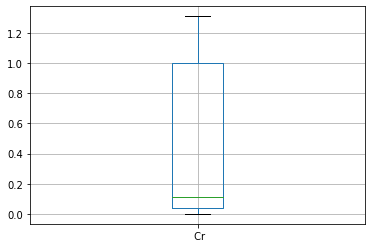

In [ ]:
# plotting Cr variable
boxplot = df.boxplot(column=[' Cr'])

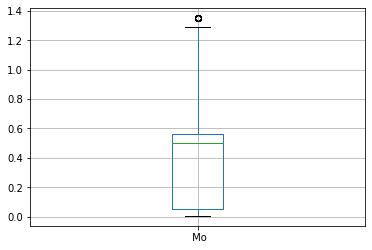

In [ ]:
# plotting Mo variable
boxplot = df.boxplot(column=[' Mo'])

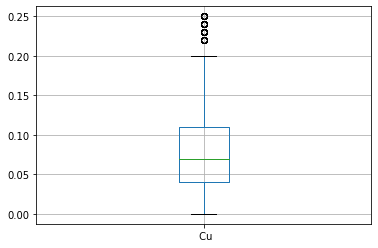

In [ ]:
# plotting Cu variable
boxplot = df.boxplot(column=[' Cu'])

In [ ]:
# calculating skewness of Cu variable
cu_skewness = df[' Cu'].skew()
cu_skewness

1.1991328994053938

In [ ]:
# trying log transformation to improve the skewness
log_cu_skewness = np.log(df[' Cu']).skew()
log_cu_skewness

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

In [ ]:
# trying root square transformation to improve the skewness
sqrt_cu_skewness = np.sqrt(df[' Cu']).skew()
sqrt_cu_skewness

0.1667967076334541

In [ ]:
# creating sqrt(Cu) column
df['sqrt(Cu)'] = np.sqrt(df[' Cu'])

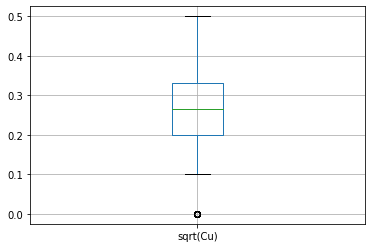

In [ ]:
# plotting sqrt(Cu) variable
boxplot = df.boxplot(column=['sqrt(Cu)'])

In [ ]:
# removing Cu column
df.drop([' Cu'], axis=1, inplace=True)
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%),sqrt(Cu)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71,0.2
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72,0.2
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69,0.2
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70,0.2
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79,0.2


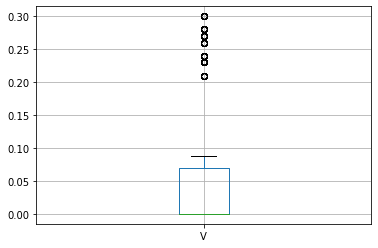

In [ ]:
# plotting V variable
boxplot = df.boxplot(column=['V'])

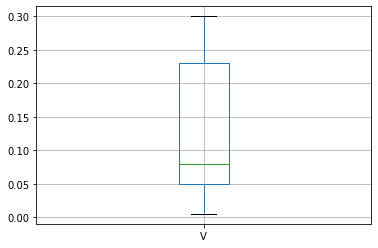

In [ ]:
# plotting non-zero V variable
df_V = df["index" and "V"]
df_V_nonzero = df_V[df_V != 0]
df_V_nonzero.to_frame().boxplot(column=["V"])

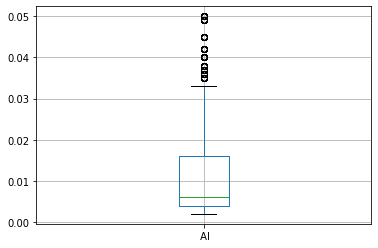

In [ ]:
# plotting Al variable
boxplot = df.boxplot(column=[' Al'])

In [ ]:
# calculating skewness of Al variable
al_skewness = df[' Al'].skew()
al_skewness

1.4308627801328626

In [ ]:
# trying log transformation to improve the skewness
log_al_skewness = np.log(df[' Al']).skew()
log_al_skewness

0.5315337198412445

In [ ]:
# trying root square transformation to improve the skewness
sqrt_al_skewness = np.sqrt(df[' Al']).skew()
sqrt_al_skewness

1.0485828955067669

In [ ]:
# creating log(Al) column
df['log(Al)'] = np.log(df[' Al'])

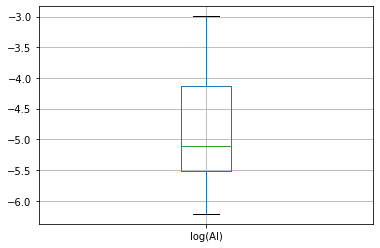

In [ ]:
# plotting log(Al) variable
boxplot = df.boxplot(column=['log(Al)'])

In [ ]:
# removing Al column
df.drop([' Al'], axis=1, inplace=True)
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,V,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%),sqrt(Cu),log(Al)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,27,342,490,30,71,0.2,-5.809143
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,100,338,454,27,72,0.2,-5.809143
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,200,337,465,23,69,0.2,-5.809143
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,300,346,495,21,70,0.2,-5.809143
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,400,316,489,26,79,0.2,-5.809143


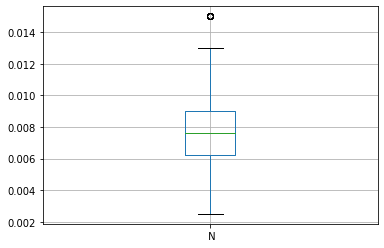

In [ ]:
# plotting N variable
boxplot = df.boxplot(column=[' N'])

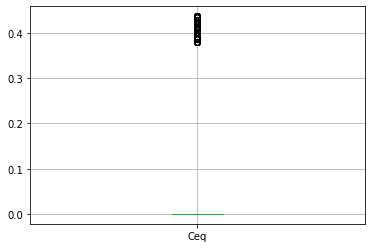

In [ ]:
# plotting Ceq variable
boxplot = df.boxplot(column=["Ceq"])

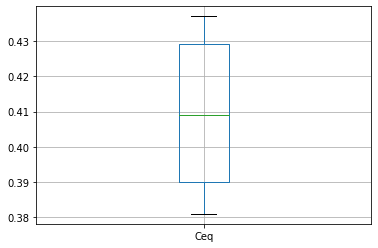

In [ ]:
# plotting Ceq non-zero variable
df_Ceq = df["index" and "Ceq"]
df_Ceq_nonzero = df_Ceq[df_Ceq != 0]
df_Ceq_nonzero.to_frame().boxplot(column=["Ceq"])

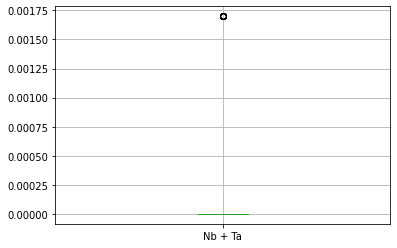

In [ ]:
boxplot = df.boxplot(column=['Nb + Ta'])

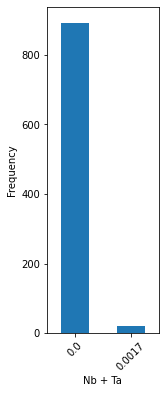

In [ ]:
# plotting Nb + Ta variable
ax = df["Nb + Ta"].value_counts().sort_index().plot.bar(xlabel="Nb + Ta", ylabel="Frequency", figsize=(2,6), rot=45)

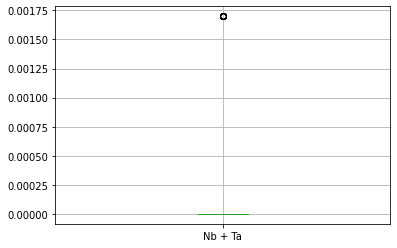

In [ ]:
boxplot = df.boxplot(column=['Nb + Ta'])

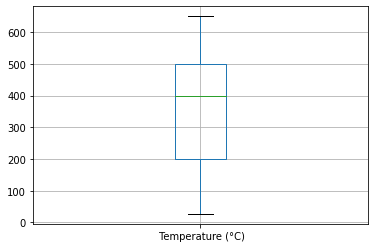

In [ ]:
# plotting Temperature (°C) variable
boxplot = df.boxplot(column=[' Temperature (°C)'])

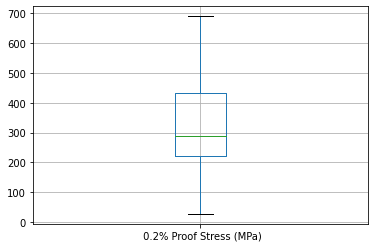

In [ ]:
# plotting 0.2% Proof Stress (MPa) variable
boxplot = df.boxplot(column=[' 0.2% Proof Stress (MPa)'])

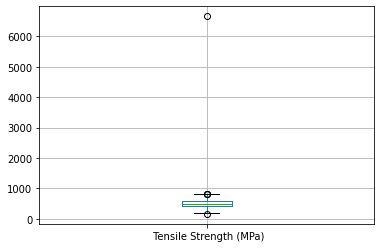

In [ ]:
# plotting Tensile Strength (MPa) variable
boxplot = df.boxplot(column=[' Tensile Strength (MPa)'])

In [ ]:
# detecting the outlier
df.loc[df[' Tensile Strength (MPa)'] > 1000]

,C,Si,Mn,P,S,Ni,Cr,Mo,V,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%),sqrt(Cu),log(Al)
626,0.18,0.37,0.66,0.018,0.017,0.1,1.07,1.03,0.3,0.0081,0.0,0.0,300,519,6661,11,28,0.34641,-3.912023


In [ ]:
#deleting the outlier
df.drop(626, inplace=True)

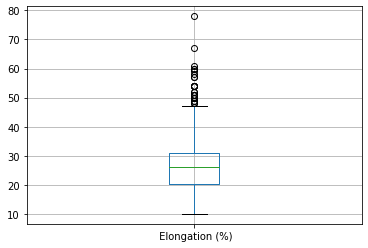

In [ ]:
# plotting Elongation (%) variable
boxplot = df.boxplot(column=[' Elongation (%)'])

In [ ]:
# calculating skewness of Elongation (%) variable
elongation_skewness = df[' Elongation (%)'].skew()
elongation_skewness

1.2259226324412027

In [ ]:
# trying log transformation to improve the skewness
log_el_skewness = np.log(df[' Elongation (%)']).skew()
log_el_skewness

0.15148159255761892

In [ ]:
# trying root square transformation to improve the skewness
sqrt_el_skewness = np.sqrt(df[' Elongation (%)']).skew()
sqrt_el_skewness

0.6509933991310631

In [ ]:
# creating log(Elongation (%)) column
df["log(Elongation (%))"] = np.log(df[' Elongation (%)'])

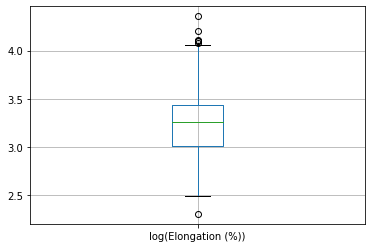

In [ ]:
# plotting log(Elongation (%)) variable
boxplot = df.boxplot(column=["log(Elongation (%))"])

In [ ]:
# removing Elongation column
df.drop([' Elongation (%)'], axis=1, inplace=True)
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,V,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Reduction in Area (%),sqrt(Cu),log(Al),log(Elongation (%))
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,27,342,490,71,0.2,-5.809143,3.401197
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,100,338,454,72,0.2,-5.809143,3.295837
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,200,337,465,69,0.2,-5.809143,3.135494
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,300,346,495,70,0.2,-5.809143,3.044522
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.0,0.0066,0.0,0.0,400,316,489,79,0.2,-5.809143,3.258097


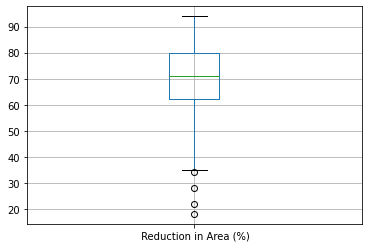

In [ ]:
# plotting Reduction in Area (%) variable
boxplot = df.boxplot(column=[" Reduction in Area (%)"])

In [ ]:
# calculating skewness of Reduction in Area (%) variable
Reduction_skewness = df[" Reduction in Area (%)"].skew()
Reduction_skewness

-0.4860118362147224

In [ ]:
# reordering the dataframe columns in original order
df = df[[' C',
 ' Si',
 ' Mn',
 ' P',
 ' S',
 ' Ni',
 ' Cr',
 ' Mo',
 'sqrt(Cu)',
 'V',
 'log(Al)',
 ' N',
 'Ceq',
 'Nb + Ta',
 ' Temperature (°C)',
 ' 0.2% Proof Stress (MPa)',
 ' Tensile Strength (MPa)',
 'log(Elongation (%))',
 ' Reduction in Area (%)']]

In [ ]:
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,sqrt(Cu),V,log(Al),N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),log(Elongation (%)),Reduction in Area (%)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,27,342,490,3.401197,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,100,338,454,3.295837,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,200,337,465,3.135494,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,300,346,495,3.044522,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,400,316,489,3.258097,79


In [ ]:
# importing libraries for heatmap building 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# calculating a correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                                 C        Si        Mn         P         S  \
 C                        1.000000 -0.406436  0.031060  0.057362  0.012374   
 Si                      -0.406436  1.000000  0.223999  0.137729 -0.076419   
 Mn                       0.031060  0.223999  1.000000  0.244273 -0.045453   
 P                        0.057362  0.137729  0.244273  1.000000  0.179056   
 S                        0.012374 -0.076419 -0.045453  0.179056  1.000000   
 Ni                       0.285822 -0.078942  0.454138 -0.143813  0.067033   
 Cr                       0.018132  0.116524 -0.474146 -0.139764  0.003919   
 Mo                       0.255229 -0.028264 -0.405245 -0.387885 -0.057536   
sqrt(Cu)                  0.369701 -0.109653  0.065908 -0.038453  0.092568   
V                         0.386180  0.197927  0.008926 -0.083414  0.044347   
log(Al)                  -0.355748  0.293360  0.641921  0.278152  0.149930   
 N                        0.035562 -0.123106 -0.236816 -0.256030

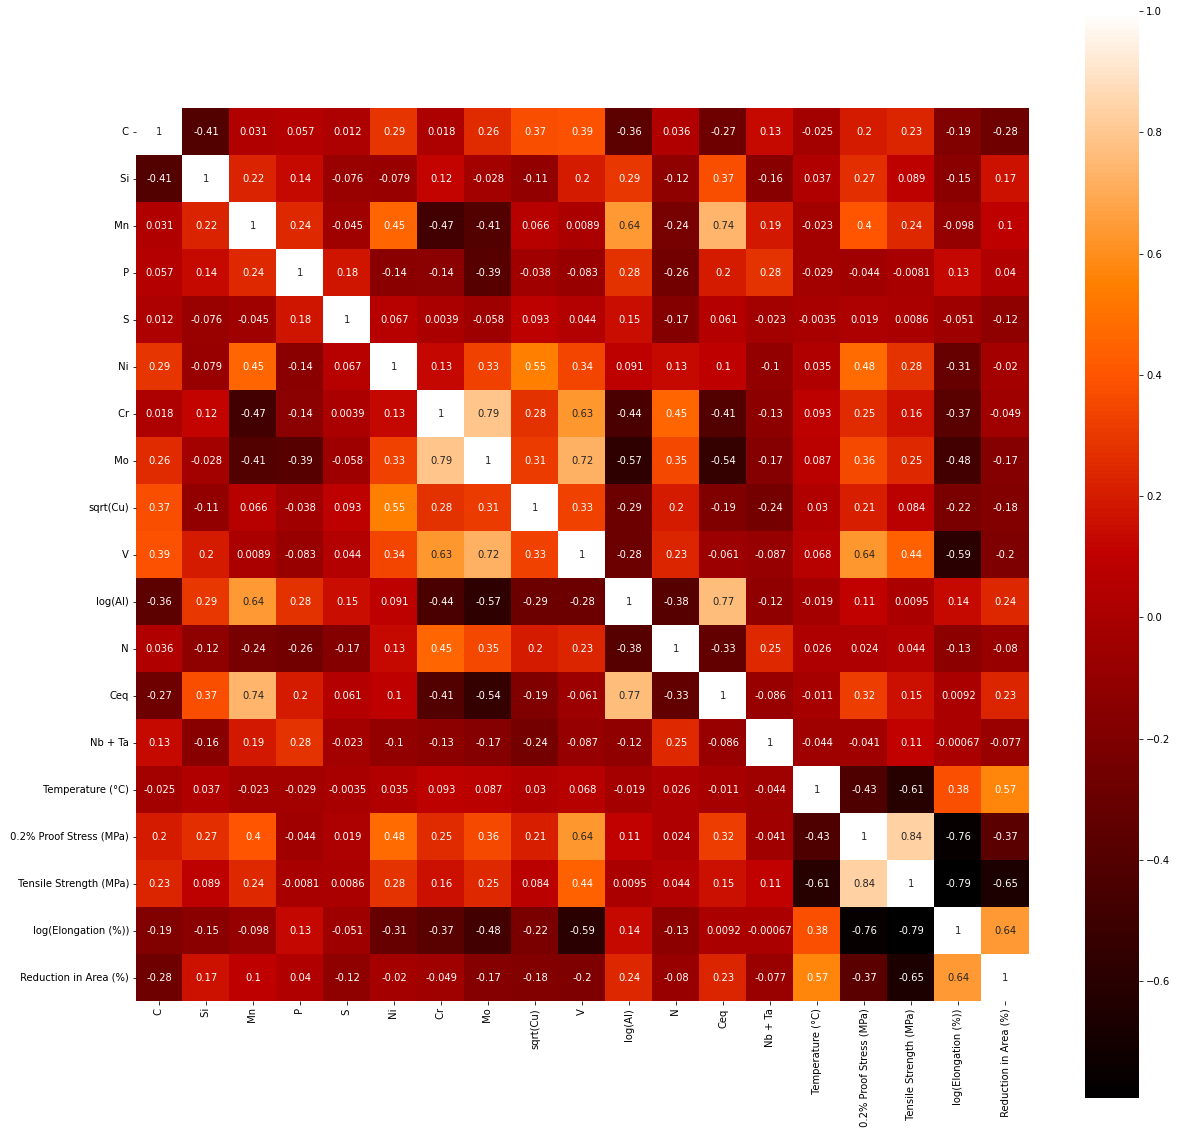

In [ ]:
# drawing a heatmap
plt.figure(figsize = (20,20))
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='gist_heat')
plt.show()

# Prediction for 0.2% Proof Stress (MPa)

In [ ]:
# defining variables
df_stress = df.copy(deep=True)
x_stress = df_stress.iloc[:, :-4].values
y_stress = df_stress.iloc[:, -4].values

In [ ]:
# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_stress_train, x_stress_test, y_stress_train, y_stress_test = train_test_split(x_stress, y_stress, test_size = 0.20, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_stress_train = sc.fit_transform(x_stress_train)
x_stress_test = sc.fit_transform(x_stress_test)

In [ ]:
# training the multiple Linear regression model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_stress_train, y_stress_train)

LinearRegression()

In [ ]:
regressor.coef_

array([  6.3,  10.8,  18.7,  -4.6,  -1.1,  18.2,   1.9,  51.6,  -0.1,
        44.3,  -0.6,  -7.3,  55.3,  10. , -64.2])

In [ ]:
regressor.intercept_

331.61285909712745

In [ ]:
# predicting the test set results
y_stress_pred = regressor.predict(x_stress_test)
np.set_printoptions(precision=0)
print(np.concatenate((y_stress_pred.reshape(len(y_stress_pred),1), y_stress_test.reshape(len(y_stress_test),1)),1))

[[412. 257.]
 [472. 445.]
 [274. 274.]
 [224. 207.]
 [319. 270.]
 [356. 378.]
 [467. 570.]
 [528. 478.]
 [248. 264.]
 [387. 343.]
 [193. 172.]
 [357. 275.]
 [210. 194.]
 [276. 210.]
 [130. 149.]
 [180. 143.]
 [161. 156.]
 [559. 537.]
 [542. 596.]
 [302. 243.]
 [255. 268.]
 [192. 188.]
 [365. 338.]
 [369. 345.]
 [359. 241.]
 [193. 175.]
 [159. 165.]
 [348. 276.]
 [373. 251.]
 [419. 421.]
 [209. 198.]
 [461. 464.]
 [338. 275.]
 [217. 213.]
 [308. 364.]
 [289. 240.]
 [270. 323.]
 [322. 303.]
 [408. 359.]
 [274. 275.]
 [432. 284.]
 [611. 620.]
 [355. 280.]
 [333. 260.]
 [559. 570.]
 [205. 209.]
 [448. 451.]
 [550. 521.]
 [454. 447.]
 [448. 443.]
 [295. 262.]
 [268. 223.]
 [172. 240.]
 [307. 322.]
 [362. 255.]
 [331. 260.]
 [323. 352.]
 [197. 194.]
 [551. 560.]
 [377. 370.]
 [248. 280.]
 [198. 197.]
 [267. 203.]
 [213. 201.]
 [378. 301.]
 [226. 257.]
 [241. 249.]
 [271. 260.]
 [432. 459.]
 [395. 360.]
 [471. 471.]
 [324. 317.]
 [337. 367.]
 [344. 185.]
 [210. 183.]
 [289. 326.]
 [175. 179.]

In [ ]:
# test scoring
from sklearn.metrics import r2_score
r2_score(y_stress_test, y_stress_pred)

In [ ]:
from sklearn.metrics import mean_squared_error

loss = mean_squared_error(y_stress_test, y_stress_pred)
print(loss)

# R2 score for Tensile Strength

In [ ]:
# defining variables
df_tensile = df.copy(deep=True)
X_tensile = df_tensile.iloc[:, :-4].values
y_tensile = df_tensile.iloc[:, -3].values

y_tensile.shape

(914,)

In [ ]:
# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_tensile_train, X_tensile_test, y_tensile_train, y_tensile_test = train_test_split(X_tensile, y_tensile, test_size = 0.20, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_tensile = StandardScaler()
X_tensile_train = sc_tensile.fit_transform(X_tensile_train)
X_tensile_test = sc_tensile.fit_transform(X_tensile_test)

In [ ]:
# training the multiple Linear regression model on the training set
from sklearn.linear_model import LinearRegression
regressor_tensile = LinearRegression()
regressor_tensile.fit(X_tensile_train, y_tensile_train)

LinearRegression()

In [ ]:
y_tensile_pred = regressor_tensile.predict(X_tensile_test)
np.set_printoptions(precision=0)
print(np.concatenate((y_tensile_pred.reshape(len(y_tensile_pred), 1), y_tensile_test.reshape(len(y_tensile_test), 1)), 1))


[[500. 375.]
 [592. 585.]
 [490. 450.]
 [426. 464.]
 [561. 480.]
 [455. 532.]
 [584. 670.]
 [652. 611.]
 [441. 575.]
 [569. 502.]
 [371. 385.]
 [578. 450.]
 [392. 420.]
 [450. 485.]
 [302. 249.]
 [303. 221.]
 [333. 266.]
 [691. 672.]
 [661. 746.]
 [480. 431.]
 [505. 632.]
 [399. 469.]
 [461. 424.]
 [464. 397.]
 [554. 431.]
 [343. 380.]
 [337. 314.]
 [440. 364.]
 [466. 343.]
 [501. 504.]
 [419. 460.]
 [570. 636.]
 [557. 480.]
 [406. 380.]
 [476. 624.]
 [369. 300.]
 [431. 517.]
 [412. 396.]
 [493. 416.]
 [450. 473.]
 [515. 391.]
 [755. 790.]
 [583. 430.]
 [547. 408.]
 [708. 710.]
 [441. 428.]
 [555. 618.]
 [670. 661.]
 [546. 609.]
 [584. 578.]
 [530. 471.]
 [459. 544.]
 [336. 383.]
 [423. 409.]
 [572. 470.]
 [551. 442.]
 [444. 481.]
 [387. 454.]
 [673. 716.]
 [481. 558.]
 [481. 540.]
 [417. 495.]
 [460. 487.]
 [408. 454.]
 [464. 376.]
 [399. 482.]
 [412. 416.]
 [456. 557.]
 [533. 602.]
 [490. 450.]
 [567. 637.]
 [519. 556.]
 [516. 606.]
 [421. 258.]
 [392. 426.]
 [547. 710.]
 [376. 368.]

In [ ]:
from sklearn.metrics import r2_score
tensile_score = r2_score(y_tensile_test, y_tensile_pred)

In [ ]:
tensile_score

0.6290707186102571

#R2 score for Elongation (%)

In [ ]:
df_el = df.copy(deep=True)
df_el.head(1)

,C,Si,Mn,P,S,Ni,Cr,Mo,sqrt(Cu),V,log(Al),N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),log(Elongation (%)),Reduction in Area (%)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,27,342,490,3.401197,71


In [ ]:
X_el = df_el.iloc[:, :-4].values
y_el = df_el.iloc[:, -2].values

In [ ]:
# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_el_train, X_el_test, y_el_train, y_el_test = train_test_split(X_el, y_el, test_size=0.20, random_state=42)


In [ ]:
sc_el = StandardScaler()
X_el_train = sc_el.fit_transform(X_el_train)
X_el_test = sc_el.fit_transform(X_el_test)

In [ ]:
regressor_el = LinearRegression()
regressor_el.fit(X_el_train, y_el_train)

LinearRegression()

In [ ]:
y_el_pred = regressor_el.predict(X_el_test)
np.set_printoptions(precision=1)
print(np.concatenate((y_el_pred.reshape(len(y_el_pred),1), y_el_test.reshape(len(y_el_test),1)),1))

[[3.  3.5]
 [3.2 3.1]
 [3.4 3.2]
 [3.5 3.2]
 [3.3 3.4]
 [3.2 2.9]
 [3.2 2.8]
 [2.7 2.8]
 [3.3 3.1]
 [3.1 3.5]
 [3.5 3.5]
 [3.1 3.5]
 [3.5 3.3]
 [3.3 3.1]
 [3.7 4. ]
 [3.5 3.9]
 [3.5 3.6]
 [2.9 3.1]
 [2.8 2.6]
 [3.3 3.2]
 [3.3 3.3]
 [3.5 3.5]
 [3.4 3.4]
 [3.1 3.3]
 [3.1 3.6]
 [3.5 3.4]
 [3.6 3.7]
 [3.4 3.7]
 [3.3 3.3]
 [3.  2.8]
 [3.5 3.4]
 [3.2 3.1]
 [3.1 3.5]
 [3.4 3.3]
 [3.2 3.2]
 [3.4 3.7]
 [3.3 3.3]
 [3.3 3.2]
 [2.9 2.9]
 [3.3 3.1]
 [3.1 3.2]
 [2.6 2.9]
 [3.  3.6]
 [3.2 3.4]
 [2.6 2.7]
 [3.5 3.4]
 [3.3 3.2]
 [2.7 2.8]
 [3.2 3.2]
 [3.2 2.9]
 [3.3 3.2]
 [3.3 3. ]
 [3.5 3.3]
 [3.4 3.1]
 [3.1 3.4]
 [3.2 3.3]
 [3.3 3.2]
 [3.5 3.4]
 [2.8 2.6]
 [3.2 3.1]
 [3.4 2.9]
 [3.5 3.5]
 [3.3 3.3]
 [3.5 3.3]
 [3.4 3.5]
 [3.4 3.2]
 [3.4 3.4]
 [3.3 3. ]
 [3.3 3.3]
 [3.3 3.4]
 [3.2 3. ]
 [3.2 2.9]
 [3.2 2.9]
 [3.4 3.9]
 [3.5 3.4]
 [3.3 3.1]
 [3.6 3.6]
 [2.8 2.8]
 [3.3 3.4]
 [3.3 3.4]
 [3.4 3.3]
 [3.1 3.6]
 [3.1 3.6]
 [3.4 3.3]
 [3.  2.8]
 [3.4 3.2]
 [3.5 3.3]
 [3.5 3.5]
 [3.3 3.4]
 [3.3 3.2]
 [3.1 3.3]

In [ ]:
r2_score(y_el_test, y_el_pred)

0.4915039405459004

# using Random Forest Regressor for Elongation (%)

In [ ]:
# training the random forest regression model on the training set
from sklearn.ensemble import RandomForestRegressor
regressor_el_2 = RandomForestRegressor()
regressor_el_2.fit(X_el_train, y_el_train)

RandomForestRegressor()

In [ ]:
# predicting the test set results
el_pred = regressor_el_2.predict(X_el_test)
np.set_printoptions(precision=1)
print(np.concatenate((el_pred.reshape(len(el_pred),1), y_el_test.reshape(len(y_el_test),1)),1))

[[3.4 3.5]
 [3.  3.1]
 [3.1 3.2]
 [3.3 3.2]
 [3.4 3.4]
 [3.1 2.9]
 [3.  2.8]
 [2.7 2.8]
 [3.3 3.1]
 [3.4 3.5]
 [3.4 3.5]
 [3.5 3.5]
 [3.3 3.3]
 [3.1 3.1]
 [3.8 4. ]
 [4.  3.9]
 [3.7 3.6]
 [3.  3.1]
 [2.6 2.6]
 [3.1 3.2]
 [3.4 3.3]
 [3.6 3.5]
 [3.5 3.4]
 [3.2 3.3]
 [3.5 3.6]
 [3.4 3.4]
 [3.6 3.7]
 [3.6 3.7]
 [3.5 3.3]
 [2.8 2.8]
 [3.4 3.4]
 [3.  3.1]
 [3.5 3.5]
 [3.5 3.3]
 [3.1 3.2]
 [3.5 3.7]
 [3.3 3.3]
 [3.1 3.2]
 [3.1 2.9]
 [3.1 3.1]
 [3.4 3.2]
 [2.9 2.9]
 [3.5 3.6]
 [3.4 3.4]
 [2.8 2.7]
 [3.5 3.4]
 [3.1 3.2]
 [2.7 2.8]
 [3.3 3.2]
 [3.  2.9]
 [3.3 3.2]
 [3.1 3. ]
 [3.4 3.3]
 [3.1 3.1]
 [3.5 3.4]
 [3.2 3.3]
 [3.2 3.2]
 [3.4 3.4]
 [2.7 2.6]
 [3.2 3.1]
 [3.  2.9]
 [3.5 3.5]
 [3.2 3.3]
 [3.3 3.3]
 [3.5 3.5]
 [3.3 3.2]
 [3.4 3.4]
 [3.1 3. ]
 [3.3 3.3]
 [3.4 3.4]
 [3.  3. ]
 [3.  2.9]
 [3.  2.9]
 [3.7 3.9]
 [3.3 3.4]
 [3.  3.1]
 [3.5 3.6]
 [2.7 2.8]
 [3.2 3.4]
 [3.3 3.4]
 [3.3 3.3]
 [3.5 3.6]
 [3.5 3.6]
 [3.4 3.3]
 [2.9 2.8]
 [3.2 3.2]
 [3.3 3.3]
 [3.4 3.5]
 [3.4 3.4]
 [3.1 3.2]
 [3.2 3.3]

In [ ]:
from sklearn.metrics import r2_score
score_el = r2_score(el_pred, y_el_test)
score_el

0.8832519523169765

# R2_score for Reduction in Area

In [ ]:
df_re = df.copy(deep=True)
df_re.head(1)

,C,Si,Mn,P,S,Ni,Cr,Mo,sqrt(Cu),V,log(Al),N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),log(Elongation (%)),Reduction in Area (%)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,27,342,490,3.401197,71


In [ ]:
X_re = df_re.iloc[:, :-4].values
y_re = df_re.iloc[:, -1].values

In [ ]:
# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_re, y_re, test_size=0.20, random_state=42)


In [ ]:
sc_re = StandardScaler()
X_re_train = sc_re.fit_transform(X_re_train)
X_re_test = sc_re.fit_transform(X_re_test)

In [ ]:
regressor_re = LinearRegression()
regressor_re.fit(X_re_train, y_re_train)

LinearRegression()

In [ ]:
y_re_pred = regressor_re.predict(X_re_test)
np.set_printoptions(precision=1)
print(np.concatenate((y_re_pred.reshape(len(y_re_pred),1), y_re_test.reshape(len(y_re_test),1)),1))

[[70.3 91. ]
 [75.9 72. ]
 [63.5 61. ]
 [69.  63. ]
 [57.1 58. ]
 [72.2 45. ]
 [73.2 64. ]
 [53.6 59. ]
 [68.8 60. ]
 [65.8 76. ]
 [79.1 85. ]
 [61.9 65. ]
 [78.5 82. ]
 [76.8 69. ]
 [74.5 83. ]
 [88.6 91. ]
 [76.5 85. ]
 [66.2 71. ]
 [67.2 51. ]
 [72.1 72. ]
 [66.8 65. ]
 [66.2 67. ]
 [84.3 90. ]
 [72.8 81. ]
 [65.8 76. ]
 [86.  85. ]
 [72.8 69. ]
 [86.1 90. ]
 [81.7 89. ]
 [69.1 58. ]
 [66.1 55. ]
 [77.  64. ]
 [58.8 75. ]
 [69.2 73. ]
 [70.1 52. ]
 [81.4 88. ]
 [72.9 64. ]
 [77.7 79. ]
 [63.8 77. ]
 [71.4 69. ]
 [79.7 89. ]
 [49.3 57. ]
 [51.5 71. ]
 [64.6 67. ]
 [51.7 36. ]
 [72.3 78. ]
 [79.8 71. ]
 [54.  62. ]
 [78.8 75. ]
 [70.  66. ]
 [59.7 55. ]
 [70.7 50. ]
 [80.5 82. ]
 [79.  78. ]
 [61.  65. ]
 [62.7 67. ]
 [77.2 72. ]
 [67.2 58. ]
 [66.9 55. ]
 [73.3 60. ]
 [60.8 52. ]
 [66.3 65. ]
 [65.8 42. ]
 [65.4 56. ]
 [86.2 85. ]
 [77.4 73. ]
 [71.7 72. ]
 [71.  50. ]
 [81.6 76. ]
 [79.  83. ]
 [77.  68. ]
 [62.6 47. ]
 [65.6 48. ]
 [84.3 82. ]
 [77.3 81. ]
 [63.2 48. ]
 [69.8 71. ]

In [ ]:
score_re = r2_score(y_re_test, y_re_pred)
score_re

0.4357162582857148

# using Random Forest Regressor for Reduction in area

In [ ]:
# training the random forest regression model on the training set
from sklearn.ensemble import RandomForestRegressor
regressor_re_2 = RandomForestRegressor()
regressor_re_2.fit(X_re_train, y_re_train)

RandomForestRegressor()

In [ ]:
# predicting the test set results
re_pred_2 = regressor_re_2.predict(X_re_test)
np.set_printoptions(precision=1)
print(np.concatenate((re_pred_2.reshape(len(re_pred_2),1), y_re_test.reshape(len(y_re_test),1)),1))

[[85.3 91. ]
 [72.8 72. ]
 [52.  61. ]
 [61.3 63. ]
 [62.6 58. ]
 [65.4 45. ]
 [65.8 64. ]
 [41.7 59. ]
 [63.9 60. ]
 [74.6 76. ]
 [82.5 85. ]
 [67.6 65. ]
 [82.9 82. ]
 [69.5 69. ]
 [81.  83. ]
 [91.4 91. ]
 [84.  85. ]
 [70.8 71. ]
 [52.4 51. ]
 [71.1 72. ]
 [63.3 65. ]
 [66.  67. ]
 [82.8 90. ]
 [84.1 81. ]
 [74.3 76. ]
 [86.4 85. ]
 [75.7 69. ]
 [75.1 90. ]
 [70.7 89. ]
 [65.9 58. ]
 [57.1 55. ]
 [66.4 64. ]
 [71.9 75. ]
 [77.4 73. ]
 [49.3 52. ]
 [85.1 88. ]
 [68.5 64. ]
 [76.4 79. ]
 [75.1 77. ]
 [69.  69. ]
 [90.8 89. ]
 [55.3 57. ]
 [65.2 71. ]
 [67.3 67. ]
 [48.9 36. ]
 [79.  78. ]
 [70.5 71. ]
 [57.8 62. ]
 [71.5 75. ]
 [63.6 66. ]
 [61.  55. ]
 [50.  50. ]
 [84.3 82. ]
 [79.4 78. ]
 [65.9 65. ]
 [66.7 67. ]
 [71.9 72. ]
 [62.  58. ]
 [55.7 55. ]
 [62.  60. ]
 [52.1 52. ]
 [63.6 65. ]
 [60.9 42. ]
 [57.1 56. ]
 [72.  85. ]
 [74.6 73. ]
 [71.3 72. ]
 [51.9 50. ]
 [77.  76. ]
 [81.5 83. ]
 [66.4 68. ]
 [41.5 47. ]
 [54.5 48. ]
 [63.3 82. ]
 [76.8 81. ]
 [51.6 48. ]
 [68.2 71. ]

In [ ]:
score_re = r2_score(y_re_test, re_pred_2)
score_re

0.7755050935707176

# Conclusion
Random Forest Regressor is giving better output as compared to Linear Regression in both the cases where Linear Regression is lagging. 

# R2 Scores
****
r2 score for 0.2% proof strength using Linear Regression - **0.8239**
****
r2 score for Tensile Strength using Linear Regression - **0.6290**
****
r2 score for Elongation(%) using Linear Regression - **0.4915** 
r2 score for Elongation(%) using Random Forest Regression - **0.8735**
****
r2 score for Reduction in Area using Linear regression - **0.4357**
r2 score for Reduction in Area using Random Forest Regression - **0.7567**
****






In [ ]:
def pred_props(C=0, Si=0, Mn=0, P=0, S=0, Ni=0, Cr=0, Mo=0, Cu=0, V=0, Al=0, N=0, Ceq=0, Nb_Ta=0, Temp=34):
  elements = [C, Si, Mn, P, S, Ni, Cr, Mo, Cu, V, Al, N, Ceq, Nb_Ta, Temp]
  elements = pd.DataFrame(elements)
  print("0.2% proof strength is ", regressor.predict(elements))
  print("Tensile Strength is ", regressor_tensile.predict(elements))
  print("Elongation(%) is ", regressor_el_2.predict(elements))
  print("Reduction in Area is ", regressor_re_2.predict(elements))



In [ ]:
pred_props(C=0.07, Si=1, Mn=2, P=0.05, S=0.03, Ni=9.25, Cr=18.5, N=0.11)

ValueError: ignored

###Try with PyTorch

In [ ]:
import torch
import torch.nn as nn

In [ ]:
df_nu = df.copy(deep=True)
x_inputs = df_nu.iloc[:, :-4].values
y_targets = df_nu.iloc[:, -4:].values


In [ ]:
x_inputs.shape

(914, 15)

In [ ]:
inputs_tr = torch.tensor(x_inputs)
targets_tr = torch.tensor(y_targets)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dl = DataLoader(inputs_tr)

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
model = nn.Linear(15, 4)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.2077,  0.0540,  0.1324,  0.0648,  0.0133, -0.1806,  0.0160,  0.0504,
         -0.2023, -0.0131, -0.1572,  0.1091,  0.2163, -0.1176,  0.2536],
        [-0.1597,  0.1915, -0.0621, -0.1737, -0.2274, -0.1214, -0.0754, -0.0326,
         -0.1640, -0.1085,  0.0911,  0.2371,  0.2562,  0.1934, -0.0334],
        [ 0.0105, -0.1085,  0.1150, -0.1566,  0.1005, -0.0869, -0.0413,  0.1702,
          0.0369,  0.0487, -0.0424,  0.2093,  0.0949, -0.1022,  0.0030],
        [ 0.0316, -0.1058, -0.1075,  0.0628, -0.0770,  0.0882,  0.0382, -0.0472,
          0.1882,  0.1437,  0.1232, -0.0321, -0.2458,  0.1235, -0.2279]],
       requires_grad=True)
Parameter containing:
tensor([ 0.2027,  0.0028, -0.1411,  0.1051], requires_grad=True)


In [ ]:
preds = model(inputs_tr.float())
preds

tensor([[   8.0669,   -1.5483,    0.2712,   -6.7999],
        [  26.5784,   -3.9880,    0.4884,  -23.4366],
        [  51.9367,   -7.3300,    0.7859,  -46.2267],
        ...,
        [ 115.3481,  -15.6159,    1.5454, -103.2284],
        [ 128.0273,  -17.2869,    1.6942, -114.6234],
        [ 140.7065,  -18.9580,    1.8429, -126.0184]],
       grad_fn=<AddmmBackward0>)

###Loss Function

In [ ]:
import torch.nn.functional as F

In [ ]:
loss_fn = F.mse_loss

In [ ]:
loss = loss_fn(model(inputs_tr.float()), targets_tr)
print(loss)

tensor(93419.5298, dtype=torch.float64, grad_fn=<MseLossBackward0>)


### Optimizer

In [ ]:
opt = torch.optim.SGD(model.parameters(), lr=10**(-5))

In [ ]:
def fit(num_epochs, model, loss_fn, opt, train_dl, targets_tr):
  for epoch in range(num_epochs):
    for xb in train_dl:
      pred = model(xb.float())
      loss = loss_fn(pred, targets_tr)
      loss.backward()
      opt.step()
      opt.zero_grad()


  if (epoch+1)%10 == 0:
    print('Epoch [{}/{}], loss : {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:

fit(100, model, loss_fn, opt, train_dl, targets_tr.float())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Using a target size (torch.Size([914, 4])) that is different to the input size (torch.Size([1, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  """


Epoch [100/100], loss : 8320.8906


In [ ]:
preds = model(inputs_tr.float())
preds

tensor([[341.4894, 509.5228,   3.3509,  73.0946],
        [343.3795, 512.3780,   3.3679,  73.5191],
        [345.9687, 516.2892,   3.3912,  74.1006],
        ...,
        [324.8907, 484.7915,   3.2112,  69.5522],
        [326.1853, 486.7471,   3.2228,  69.8430],
        [327.4799, 488.7026,   3.2345,  70.1337]], grad_fn=<AddmmBackward0>)

In [ ]:
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,sqrt(Cu),V,log(Al),N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),log(Elongation (%)),Reduction in Area (%)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,27,342,490,3.401197,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,100,338,454,3.295837,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,200,337,465,3.135494,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,300,346,495,3.044522,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.2,0.0,-5.809143,0.0066,0.0,0.0,400,316,489,3.258097,79
